# Creating Filters


### Filters
    
   Filters are used for removing unwanted information and to amplify the feature of interest or region of interest. Each image has few characteristic, one among which is frequency. 

**Frequency in Images**
    
   - Drastic change in pixel value in a bunch or a group of pixels. It helps in **identifying the edges** in the image. We can think of frequency in an image as the rate of change. Parts of the image that change rapidly from one color to another (e.g. sharp edges) contain high frequencies, and parts that change gradually (e.g. large surfaces with solid colors) contain only low frequencies.

**High Frequency image**

   - Images where the intensity changes a lot i.e. level of brightness changes quickly from one pixel to another.

**Low Frequency Image**

   - Images where the intensity don't change a lot i.e. level of brightness changes slowly from one pixel to another.

**Fourier Transform**

   - Fourier Transform is used to analyze frequency characteristics of various filters.

[Fourier Transform](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)

### Using Sobel Filter to find the edges in an image

**Sobel Filter**

- The Sobel filter is used for edge detection. It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction.


In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

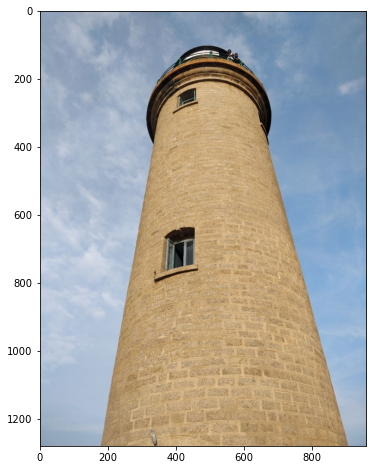

In [13]:
light_house = cv2.imread("../Images/light_house.jpeg")
image_copy = np.copy(light_house)
lh_rgb = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 8))
plt.imshow(lh_rgb)

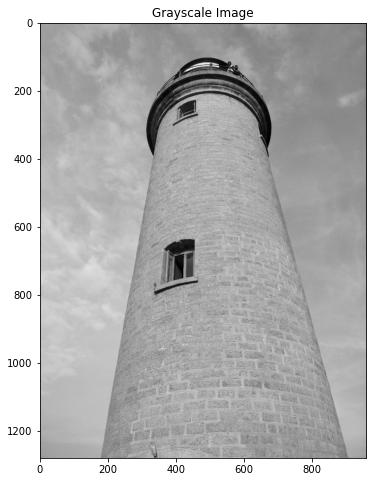

In [14]:
lh_grayscale = cv2.cvtColor(lh_rgb,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6, 8))
plt.title("Grayscale Image")
plt.imshow(lh_grayscale,cmap='gray')

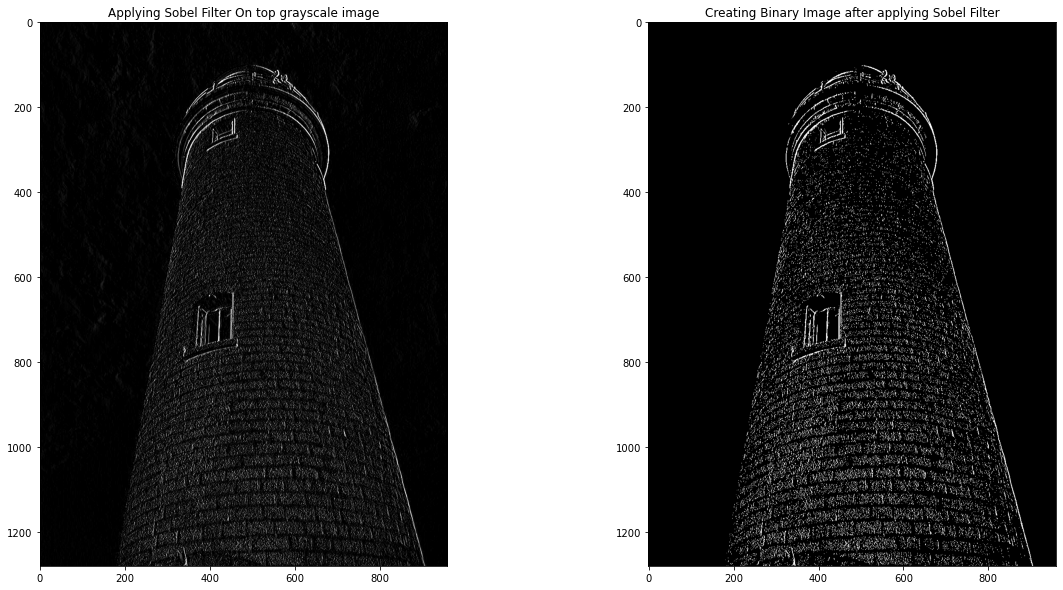

In [15]:
vertical_kernal = np.array([[-1,0,1],
                            [-2,0,2],
                            [-1,0,1]])
filtered_img = cv2.filter2D(lh_grayscale,-1,vertical_kernal)
retval,black_white_img = cv2.threshold(filtered_img,70,255,cv2.THRESH_BINARY)


f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Applying Sobel Filter On top grayscale image")
ax1.imshow(filtered_img, cmap='gray')

ax2.set_title("Creating Binary Image after applying Sobel Filter")
ax2.imshow(black_white_img, cmap='gray')

### Few important definitions

**High Pass filter**

   - Sharpens the images and Enhances the high frequency parts of the image. Sometimes HPF can exaggerate noise in the image by amplifying it like in the image of light house where the edges are detected between the stones of the light house.
  
**Low Pass Filter(LPF)**
    
   - Blur/smoothens the image. Blocks high frequency parts of the image.


**Edge Handling**
   
   - Kernel convolution relies on centering a pixel and looking at it's surrounding neighbors. So, what do you do if there are no surrounding pixels like on an image corner or edge? Well, there are a number of ways to process the edges, which are listed below. It’s most common to use padding, cropping, or extension. In extension, the border pixels of an image are copied and extended far enough to result in a filtered image of the same size as the original image.

 **Extend** *The nearest border pixels are conceptually extended as far as necessary to provide values for the convolution. Corner pixels are extended in 90° wedges. Other edge pixels are extended in lines.*

 **Padding** *The image is padded with a border of 0's, black pixels.*

 **Crop** *Any pixel in the output image which would require values from beyond the edge is skipped. This method can result in the output image being slightly smaller, with the edges having been cropped.*

**Gradients**
   - Gradients are a measure of intensity change in an image, and they generally mark object boundaries and changing area of light and dark. If we think back to treating images as functions, F(x, y), we can think of the gradient as a derivative operation F ’ (x, y). Where the derivative is a measurement of intensity change.

**Noise**
   - Speckle or discoloration of the image.Doesn't contain any useful information.
    
Before Applying HPF on an image, its better to remove the noise from the image because HPF exaggerate the image 
intensity so viceversa it will also increase the noise content of the image. So we will apply LPF before HPF to 
reduce the noise in the image.




**Applying Low Pass Filter**
   - To reduce the noise in the image by smoothening it or averaging the pixel point by surrounding pixel value.
   - Gaussian Blur is a low pass filter, attenuating high frequency signals.

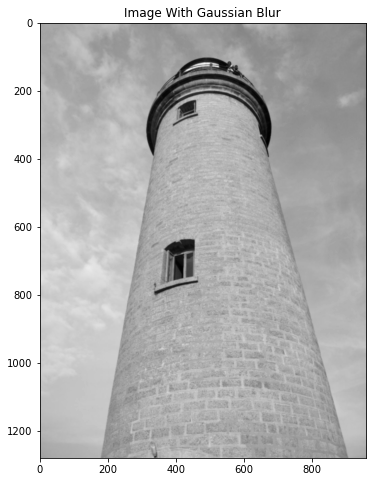

In [16]:
gray_blur = cv2.GaussianBlur(lh_grayscale,(5,5),0)
plt.figure(figsize=(6, 8))
plt.title("Image With Gaussian Blur")
plt.imshow(gray_blur,cmap='gray')

- Applying High Pass Filter after Low Pass filter(Gaussian Blur). Below vertical kernal refers to Sobel Filter.

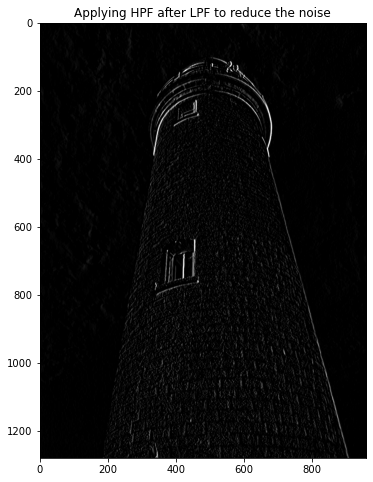

In [17]:
filtered_image = cv2.filter2D(gray_blur,-1,vertical_kernal)
plt.figure(figsize=(6, 8))
plt.title("Applying HPF after LPF to reduce the noise")
plt.imshow(filtered_image,cmap='gray')

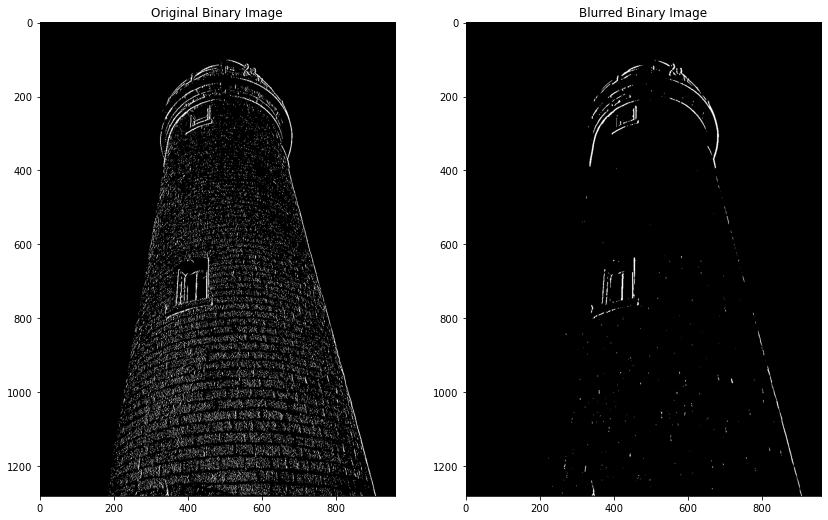

In [18]:
# Create Binary Image

retval,black_white_img_blur = cv2.threshold(filtered_image,80,255,cv2.THRESH_BINARY)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(14, 12))

ax1.set_title("Original Binary Image")
ax1.imshow(black_white_img,cmap='gray')

ax2.set_title("Blurred Binary Image")
ax2.imshow(black_white_img_blur,cmap='gray')

***The noise in the image is reduced drastically after applying low pass filter like Gaussian Blur to reduce the noise and then applying filter like Sobel Filter (Edge Detector).***

### Canny Edge Detection

A series of steps in Canny Edge Detection

   * Gaussian Blur - To reduce the noise in the image
   * Sobel Filter - To amplify the regions after noise reduction
   * Apply Non-maximum suppression to isolate the strong edges and thin them to one pixel wide lines.
   * Uses hysteresis to isolate the best edges
   
Its better to have threshold (l:h) value as (1:2 or 1:3) for better results

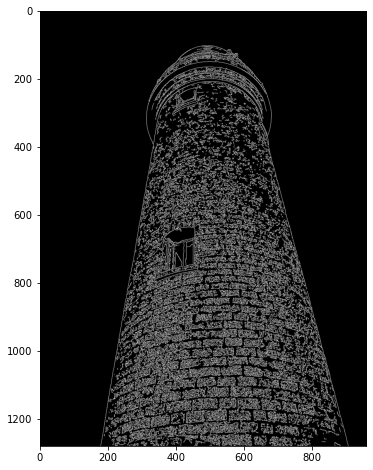

In [19]:
lower = 80
upper = 160
edge = cv2.Canny(lh_grayscale,lower,upper)
plt.figure(figsize=(6, 8))
plt.imshow(edge,cmap='gray')

- Applying Canny with wide and tight threshold

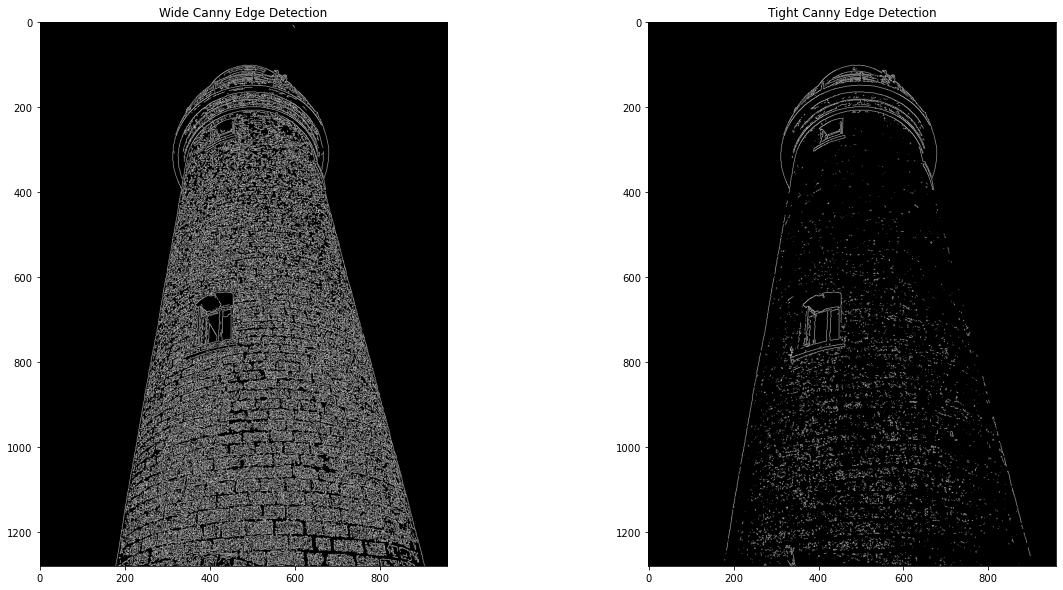

In [20]:
wide = cv2.Canny(lh_grayscale,60,100)
tight = cv2.Canny(lh_grayscale,200,240)

f, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))

ax1.set_title("Wide Canny Edge Detection")
ax1.imshow(wide,cmap='gray')

ax2.set_title("Tight Canny Edge Detection")
ax2.imshow(tight,cmap='gray')

### Hough Transform

After finding Edges, it is obvious that we find the object which is encapsulated by the edges. So Hough Transform
helps in transforming image data from the x-y coordinate system into Hough space, where you can easily identify simple boundaries like lines and circles. HT is used in shape recognition applications.

**Line Detection**

   Hough space - it converts line in image space into a point in Hough Space. Line equation is "y = mx + c" where m and c are constant. So (m,c) point in hough space is the point convert from line.
   
[Hough Transform](http://homepages.inf.ed.ac.uk/rbf/HIPR2/hough.htm)

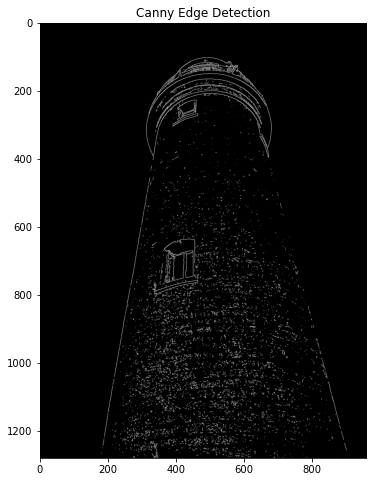

In [21]:
lh_rgb = cv2.cvtColor(light_house,cv2.COLOR_BGR2RGB)
lh_gray = cv2.cvtColor(lh_rgb,cv2.COLOR_RGB2GRAY)
low = 200
high = 240
lh_canny = cv2.Canny(lh_gray,low,high)
plt.figure(figsize=(6, 8))
plt.title("Canny Edge Detection")
plt.imshow(lh_canny,cmap='gray')

### Hough Line Detection

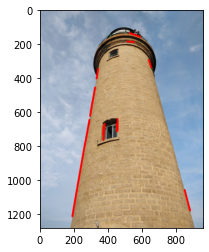

In [22]:
rho = 1
theta = np.pi/180
threshold = 60
max_line_length = 40
max_line_gap = 5

lines = cv2.HoughLinesP(lh_canny,rho,theta,threshold, np.array([]),max_line_length,max_line_gap)
line_img = np.copy(lh_rgb)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_img,(x1,y1),(x2,y2),(255,0,0),10)
        
plt.imshow(line_img,cmap='gray')